# M4 - Tarea: Utilización de Python para recolectar y analizar datos.

## 1. Creación de un Listener para escuchar tweets y su almacenamiento en un archivo csv.
    
Mediante la libreria tweety de Python, se ha creado un Listerner para escuchar twees en estreaming utilizando como palabra  clave de busqueda "Trump" para tweets en Inglés como idioma y además no se consideraran los retweets. De los tweets obtenidos se extraerá la información de los campos (text, created_at, country, user.created_at, user.name, user.screen_name) que serán almaenados en un archivo csv con los correspondientes headers. El listener ha estado escuchando tweets en 2 sesiones distintas pertenecientes al mismo día por lo que se han generado 2 archivos csv para los tweets recolectados.

In [ ]:
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
import time
import csv
import sys

# Access keys
ckey = 'NZdwnFSAxKb3AAeTthxtEzeu0'
csecret = 'ifpQe3rJk3yPcSlMlkm0oAZs44XSc7SFFj8rIcTIrROYEJ1knj'
atoken = '938485649333727232-Cgpk1Fkil6rDkRy56vhddaji7quQf5K'
asecret = '8yFGXH1nEXryR8D2bCO20dspjS60IBaPUimKV5vowDBVW'


class listener(StreamListener):

    # Create a new file with that filename
    csvFile = open('tweets.csv', 'w')

    # Create a csv writer
    csvWriter = csv.writer(csvFile)

    # Write a single row with the headers of the columns
    csvWriter.writerow(['text',
                        'created_at',
                        'country',
                        'user.created_at',
                        'user.name',
                        'user.screen_name'])

    def on_status(self, status):
        # Open the csv file created previously
        csvFile = open('tweetsF3.csv', 'a')

        # Create a csv writer
        csvWriter = csv.writer(csvFile)

        # If the tweet is not in a retweet
        if 'RT @' not in status.text:
            # Try to
            try:
                # Write the tweet's information to the csv file
                csvWriter.writerow([status.text,
                                    status.created_at,
                                    status.place.country,
                                    status.user.created_at,
                                    status.user.name,
                                    status.user.screen_name])
                # Close the csv file
            except:
                pass
                # Close the csv file
    csvFile.close()

    def on_error(self, status):
        print (status)

auth = OAuthHandler(ckey, csecret)
auth.set_access_token(atoken, asecret)
twitterStream = Stream(auth, listener())
twitterStream.filter(track=["Trump"], languages=['en'])


## 2. Creación de un DataFrame con los tweets almacenados.

Lectura de los tweets almacenados en los archivos csv obtenidos tras la escucha y primera visualizacion:

In [323]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

# read csv files tweets
dfA = pd.read_csv("./tweetsF3.csv",
                  delimiter=',', quotechar='"', header=0, encoding='utf-8')
dfB = pd.read_csv("./tweetsF4.csv",
                  delimiter=',', quotechar='"', header=0, encoding='utf-8')

# merge dataframes
df = pd.concat([dfA, dfB])

print(df.head())


                                                text           created_at  \
0  Oops @realDonaldTrump It truly has been a grea...  2017-12-21 05:43:04   
1  #Tennessee @Tennessean \r\nWHAT A DUCK UP\r\nh...  2017-12-21 05:43:28   
2  There are so many problems that were over look...  2017-12-21 05:43:37   
3  Stop tweeting and work on #impeachment @RepMax...  2017-12-21 05:43:44   
4  @BreitbartNews @USArealnews Cha Ching. 200,000...  2017-12-21 05:43:56   

         country      user.created_at      user.name user.screen_name  
0  United States  2009-03-10 05:00:16    Jim Trainor         Train816  
1  United States  2010-11-16 01:47:02   Ken Holsclaw      KenHolsclaw  
2  United States  2011-08-27 19:48:53     iris adams       irismadams  
3  United States  2009-09-29 22:26:34  melanieknight   melaniepknight  
4  United States  2016-12-17 02:35:22  markjrobinson         155thMed  


Veamos el número de tweets del dataframe:

In [324]:
# number of tweets
len(df.index)


5137

## 3. Operaciones de limpieza para el campo text del DataFrame

A continuación se relalizan operaciones de limpieza con el fin de eliminar caracteres especiales, saltos de linea, links y convertir texto a minúsculas del campo text para los tweets recolectados.

In [325]:
# Removes the character specified
df['text'] = df['text'].replace(r'&amp', '', regex=True)
# remove special characters
df['text'] = df['text'].replace(
    r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", '', regex=True)
# remove link
df['text'] = df['text'].replace(
    r'https?:\/\/.*\/[a-zA-Z0-9]*', '', regex=True)
# convert text to lower case
df['text'] = df['text'].str.lower()

print(df.text.head(20))
print(df.text.tail(20))


0     oops  it truly has been a great seven year run...
1                             tennessee  what a duck up
2     there are so many problems that were over look...
3            stop tweeting and work on impeachment     
4       cha ching 200000 bonuses and 200000 more tru...
5     has trump persuaded orrin hatch to block mitt ...
6                                   trump needs to pray
7     could only happen in america or north korea ma...
8          nikki resign now before its too late  bef...
9      buying trumps cheap azz made in china suits a...
10          get them all especially the ho pimp hilary 
11     as repulsive as i found pence equally fascina...
12                           i hate straight white men 
13    without new laws or walls trump presses the br...
14       trump could stand to lose a few pounds hmmmmm 
15    i feel bad for him he thinks he has a followin...
16                     start looking at trumps mob ties
17               and votes trump money rightmone

## 4. Creación de columnas adicionales para el DataFrame.

A continuación se añaden al dataframe las nuevas columnas que continenen la fecha, la hora, número de palabras del tweet y número de caracteres del tweet.

In [326]:
# date
df['date'] = df['created_at'].str.extract('([^\s]*)', expand=True)
# time
df['time'] = df['created_at'].str.extract(
    '\d+-\d+-\d+\s*([^\:]*)', expand=True)
# num words
df['num_words'] = df['text'].apply(lambda x: len(str(x).split(' ')))
# num characters
df['num_characters'] = df['text'].str.len()


## 5. Creación de un nuevo DataFrame con las columnas relevantes.

Por último se crea un nuevo dataframe a partir del dataframe anterior con las columnas relevantes y además se renombran las columnas. 

In [327]:
# create a new data frame with the relevant columns
df1 = df[['user.screen_name', 'country', 'date',
          'time', 'num_characters', 'num_words', 'text']]
# rename columns
df1.columns = ['user', 'location', 'date',
               'time', 'num_characters', 'num_words', 'text']

print(df1.head())


             user       location        date time  num_characters  num_words  \
0        Train816  United States  2017-12-21   05              70         16   
1     KenHolsclaw  United States  2017-12-21   05              25          6   
2      irismadams  United States  2017-12-21   05             119         26   
3  melaniepknight  United States  2017-12-21   05              42         11   
4        155thMed  United States  2017-12-21   05              55         11   

                                                text  
0  oops  it truly has been a great seven year run...  
1                          tennessee  what a duck up  
2  there are so many problems that were over look...  
3         stop tweeting and work on impeachment       
4    cha ching 200000 bonuses and 200000 more tru...  


## 6. Agregación del DataFrame por el campo hora y número de tweets por hora.

Utilizando la función groupby se muestra el numero de tweets recolectados para cada hora durante el tiempo que se estuvo recolectando tweets.

In [328]:
# group data frame by time and number of tweets per each hour
groupby_time = df1['time'].groupby(df1['time']).count()
groupby_time


time
05     58
06    196
07    125
08    110
09    116
10    112
11    198
12    307
13    426
14    398
15    430
16    436
17    542
18    492
19    527
20    406
21    258
Name: time, dtype: int64

## 7. Análisis estadístico de los tweets obtenidos.

### 7.1. Distribución de los tweets obtenidos según la hora del día.

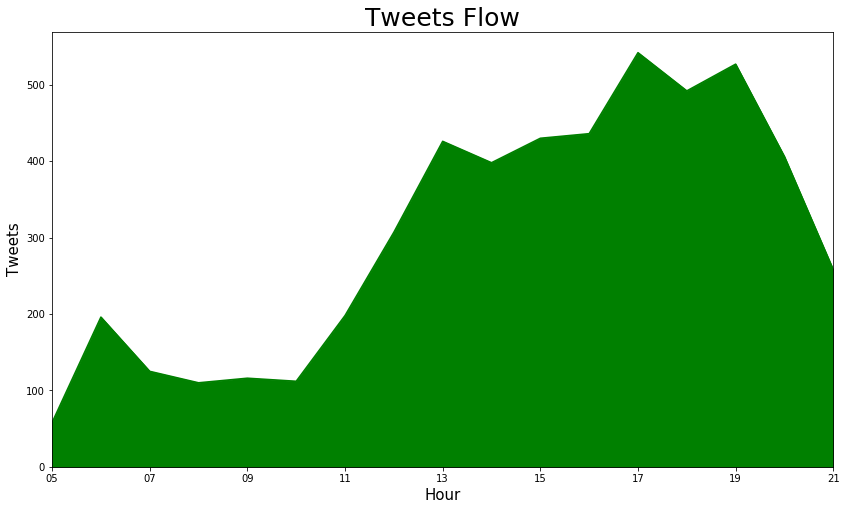

In [384]:
# tweets per hours
plt.rcParams['figure.figsize'] = (14, 8)

flow_tweets = groupby_time.plot(kind='area', color='green')
flow_tweets.set_xlabel('Hour', fontsize=15)
flow_tweets.set_ylabel('Tweets', fontsize=15)
flow_tweets.set_title('Tweets Flow', fontsize=25)
show()


Se observa como a partir de las 11 de la mañana el número de tweets empieza a aumentar considerablemente alcanzando el máximo valor a las 17 horas de la tarde. Durante las 17 horas y las 19 horas es cuando más tweets se han recolectado, empezando a decender el número a partir de las 19 horas.

### 7.2. Usuarios con mayor número de tweets.

Para obetener los usuraios con mayor número de tweets, primero se obtendrán los valores descriptivos del campo user:

In [365]:
# group by user
groupby_user = df1['user'].groupby(df1['user']).count()
groupby_user.describe()


count    3687.000000
mean        1.393274
std         1.592487
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        62.000000
Name: user, dtype: float64

Se observa que el usuario que tiene un mayor número de tweets corresponde a un valor de 62 tweets, siendo la media de tweets por usuario algo mayor de 1, por lo que se consideran mostrar los usuarios que tienen más de 5 tweets:

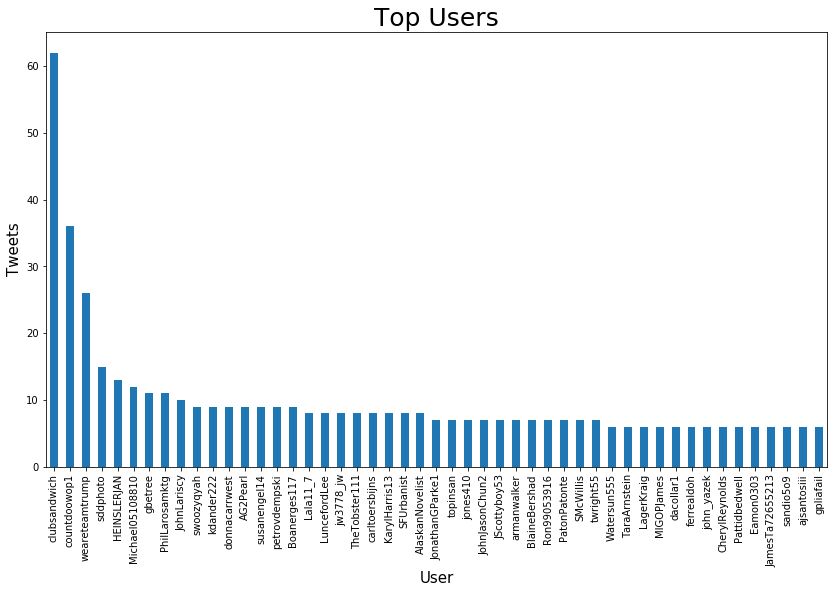

In [425]:
# top users
top_users = groupby_user[groupby_user > 5]

plt.rcParams['figure.figsize'] = (14, 8)

tweets_user = top_users.plot(kind='bar')
tweets_user.set_xlabel('User', fontsize=15)
tweets_user.set_ylabel('Tweets', fontsize=15)
tweets_user.set_title('Top Users', fontsize=25)
show()


### 7.3. Palabras que aparecen con mayor frecuencia en los tweets.

A continuación se muestran las 50 palabras más frecuentes en los tweets obtenidos para el idioma inglés.

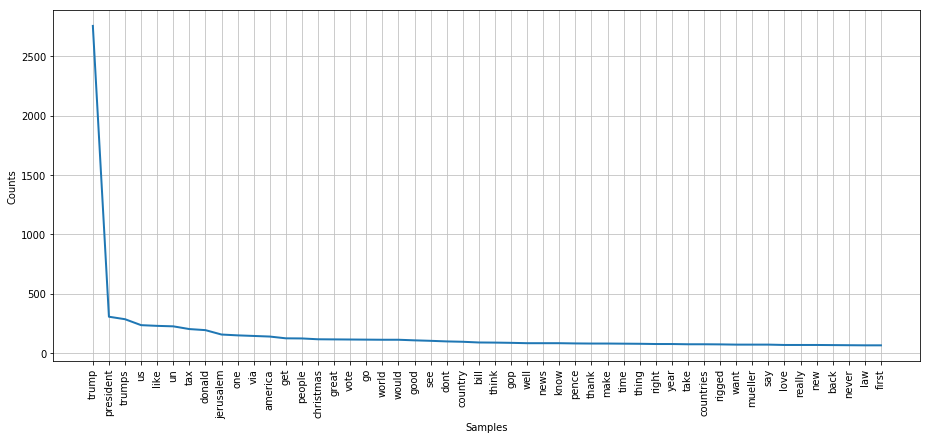

None


In [367]:
import nltk
from nltk.corpus import stopwords
from nltk import FreqDist

# get english stopwords
stop = stopwords.words('english')
texts = df1.text

tokens = []

# strip words of punctuation marks
for text in texts.values:
    tokens.extend([word.lower().strip(':,."-') for word in text.split()])

filtered_tokens = [word.decode('utf-8')
                   for word in tokens if not word.decode('utf-8') in stop]

freq_dist = nltk.FreqDist(filtered_tokens)
plt.subplots_adjust(wspace=0.6, hspace=0.6, left=0.1,
                    bottom=0.35, right=0.96, top=0.96)
print freq_dist.plot(50)


Podemos observar como la palabra "tax" aparece entre las primeras con mayor frecuencia en los tweets, lo que tiene sentido debido a la reciente reforma fiscal llevada a cabo en Estados Unidos.

### 7.4. Distribución de los tweets obtenidos por localización.

A continuación se muestra un análisis de la procedencia de los tweets obtenidos.

Agrupamos los tweets por localización y mostramos las localizaciones que aparecen con mayor frecuencia en orden descendente:

In [368]:
# tweets by location
groupby_location = df1['location'].groupby(
    df1['location']).count().sort_values(ascending=False)

print(groupby_location.head())


location
United States     4300
United Kingdom     224
Canada             219
Ireland             47
Australia           34
Name: location, dtype: int64


Se observa como era de esperar que la mayor parte de los tweets obtenidos proceden de Estados Unidos y a continuación le siguen los principales países de lengua inglesa. Veamos la disdribución de los tweets obtenidos fuera de Estados Unidos para los localizaciones con mayor número de tweets:

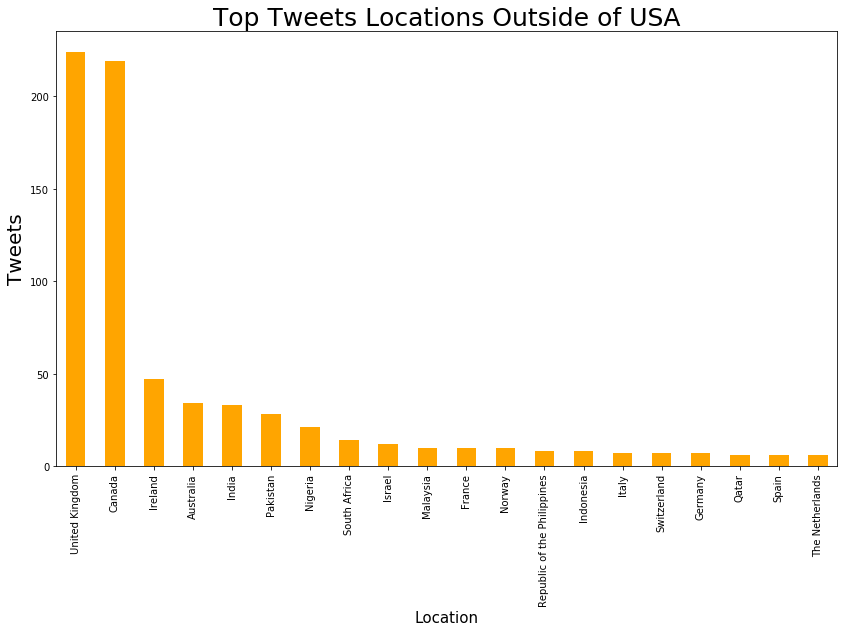

In [372]:
# tweets posted outside of USA
non_usa = groupby_location[groupby_location.index != "United States"]
top_nonusa = non_usa[non_usa > 5]

plt.rcParams['figure.figsize'] = (14, 8)

top_nonusa_tweets = top_nonusa.plot(kind='bar', color='orange')
top_nonusa_tweets.set_xlabel('Location', fontsize=15)
top_nonusa_tweets.set_ylabel('Tweets', fontsize=20)
top_nonusa_tweets.set_title('Top Tweets Locations Outside of USA', fontsize=25)
plt.show()


### 7.5. Análisis descriptivo del número de palabras presentes en los tweets.

A continuación se obtendrán los principales valores estadísticos para el campo número de palabras:

In [339]:
# describe num_words field
df1.num_words.describe()


count    5137.000000
mean       12.093634
std         5.947623
min         1.000000
25%         7.000000
50%        12.000000
75%        16.000000
max        42.000000
Name: num_words, dtype: float64

Vemos como el número de palabras en los tweets oscila en un intervalo que va desde 1 palabra hasta el máximo obtenido de 42 palabras, siendo la media de palabras en los tweet de 12. Veamos los una distribución de los tweets agrupados por el número de palabras que contienen:

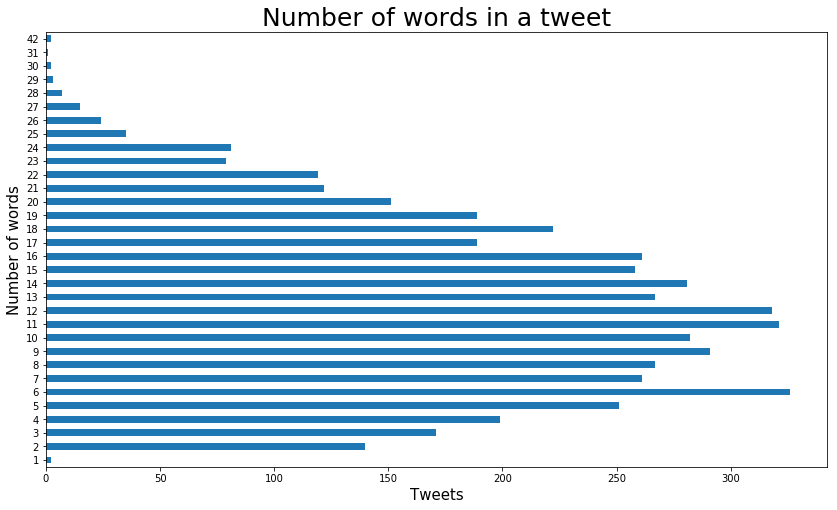

In [380]:
# group by number of words
groupby_num_words = df1['num_words'].groupby(df1['num_words']).count()

plt.rcParams['figure.figsize'] = (14, 8)

num_words_tweets = groupby_num_words.plot(kind='barh')
num_words_tweets.set_xlabel('Tweets', fontsize=15)
num_words_tweets.set_ylabel('Number of words', fontsize=15)
num_words_tweets.set_title('Number of words in a tweet', fontsize=25)
show()


### 7.6. Análisis descriptivo del número de caracteres presentes en los tweets.

A continuación se obtendrán los principales valores estadísticos para el campo número de caracteres:

In [346]:
df1.num_characters.describe()

count    5137.000000
mean       60.316722
std        31.803046
min         0.000000
25%        33.000000
50%        59.000000
75%        85.000000
max       140.000000
Name: num_characters, dtype: float64

Observamos como el número de caracteres medio en un tweet es de 60 siendo el máximo 140 caracteres. Veamos la distribución del número de caracteres en los tweets según la localización:

In [443]:
def get_stats(group):
    return {'min': group.min(),
            'max': group.max(),
            'count': group.count(),
            'mean': group.mean()}


df1['num_characters'].groupby(df1['location']).apply(get_stats).unstack()

,count,max,mean,min
location,,,,
Argentina,3.0,104.0,56.000000,5.0
Armenia,2.0,95.0,82.500000,70.0
Australia,34.0,131.0,68.588235,8.0
Austria,2.0,87.0,74.500000,62.0
Bahamas,2.0,71.0,63.500000,56.0
Bangladesh,1.0,80.0,80.000000,80.0
Barbados,1.0,24.0,24.000000,24.0
Belgique,1.0,20.0,20.000000,20.0
Belgium,1.0,61.0,61.000000,61.0
